# Black Scholes Model

The Black-Scholes Model was developed by professor Fisher Black, Myron Scholes, and Robert Merton. The model is used to value option contracts. The model has the following assumptions: 
- Lognormal distribution for the stock price
- There are no transaction costs or taxes
- There is no cash flow from the underlying asset during the time to maturity of the option
- There are no arbitrage opportunities
- Investors can borrow or lend at the risk free rate 
- The risk free rate is constant
- The model is based on European-style options


In order to deduct the formula, the key concept from the matematical model is that both option and stock price depends on the same underlying source of uncertainty. This uncertainty could be eliminated by constructing a portfolio with the stock and the option. This portfolio should be instantaneously riskless and earn the risk-free rate. The portfolio will required continuous rebalancing.

The mathematical formula to calculate the call price of an European option is:

\begin{equation*}
C = S_t N \left(d1 \right) - K e^{-rt} N \left(d2 \right)
\end{equation*}

__Where:__

\begin{equation*}
d1 = \frac{ \ln{ \frac{S_t}{K} + \left(r + \frac{\sigma_u^2}{2} \right) t} }{\sigma_s \sqrt{t}}
\end{equation*}

and:

\begin{equation*}
d2 = d1 -  \sigma_s \sqrt{t}
\end{equation*}


__Where:__

\begin{alignat*}{}
&C \quad & = \quad & \text{Call option price} \\
&S \quad & = \quad & \text{Current stock (or other underlying) price} \\
&K \quad & = \quad & \text{Strike price} \\
&r \quad & = \quad & \text{Risk-free interest rate} \\
&t \quad & = \quad & \text{time to maturity} \\
&N \quad & = \quad & \text{A normal distribution}
\end{alignat*}

In this notebook, I will automate a process to calculate the call price of any option given all the paramaters required in the Black-Scholes model. To do that, I will use Python, specifically Yfinance and Quandl, libraries to obtain the required data.

First, let's import the necessary libraries to make the analysis.

__note:__ Some libraries might not be pre-installed so the reader will need to uncomment the line code to install them. 

In [1]:
#pip install stockquotes
#pip install Quandl

import math
import scipy.stats as st
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import stockquotes
import quandl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

I will use Quandl library to obtain information about the risk free rate. To use Quandl, you will need to set up an account and get an API key. The code to call Quandl API is: <code>quandl.ApiConfig.api_key = 'YOUR KEY GOES HERE'</code>

In [2]:
 # @hidden_cell
quandl.ApiConfig.api_key = 'JMxryiBcRV26o9r5q7uv'

In [3]:
GSPC = yf.Ticker('^GSPC')

In [4]:
expirations = GSPC.options
expirations

('2020-12-17', '2021-12-16')

In [5]:
GSPC_opts = GSPC.option_chain(expirations[0])
GSPC_opts

Options(calls=        contractSymbol       lastTradeDate  strike  lastPrice     bid  \
0   SPX201218C00100000 2020-06-17 17:28:59   100.0    3012.68  3029.6   
1   SPX201218C00200000 2020-06-18 16:31:43   200.0    2878.00  2929.3   
2   SPX201218C00300000 2020-06-02 19:11:54   300.0    2738.00  2767.9   
3   SPX201218C00400000 2020-06-02 19:11:51   400.0    2638.40  2668.4   
4   SPX201218C00500000 2020-06-09 23:08:40   500.0    1790.50  2621.2   
..                 ...                 ...     ...        ...     ...   
89  SPX201218C03800000 2020-07-06 19:48:52  3800.0      11.30     9.9   
90  SPX201218C03900000 2020-07-06 18:47:23  3900.0       6.80     6.3   
91  SPX201218C04000000 2020-07-06 19:11:46  4000.0       4.66     4.2   
92  SPX201218C04100000 2020-07-02 16:58:11  4100.0       3.17     2.9   
93  SPX201218C04200000 2020-07-06 16:18:55  4200.0       2.20     2.0   

        ask  change  percentChange  volume  openInterest  impliedVolatility  \
0   3033.10     0.0           

In [6]:
GSPC_calls = GSPC_opts.calls
GSPC_calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPX201218C00100000,2020-06-17 17:28:59,100.0,3012.68,3029.6,3033.10,0.0,0.0,345,3263,0.000010,True,REGULAR,USD
1,SPX201218C00200000,2020-06-18 16:31:43,200.0,2878.00,2929.3,2932.80,0.0,0.0,73,3137,0.000010,True,REGULAR,USD
2,SPX201218C00300000,2020-06-02 19:11:54,300.0,2738.00,2767.9,2772.40,0.0,0.0,8,86,0.000010,True,REGULAR,USD
3,SPX201218C00400000,2020-06-02 19:11:51,400.0,2638.40,2668.4,2672.80,0.0,0.0,6,16,0.000010,True,REGULAR,USD
4,SPX201218C00500000,2020-06-09 23:08:40,500.0,1790.50,2621.2,2625.40,0.0,0.0,0,59,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,SPX201218C03800000,2020-07-06 19:48:52,3800.0,11.30,9.9,10.40,0.0,0.0,26,14514,0.170869,False,REGULAR,USD
90,SPX201218C03900000,2020-07-06 18:47:23,3900.0,6.80,6.3,6.80,0.0,0.0,113,7263,0.174294,False,REGULAR,USD
91,SPX201218C04000000,2020-07-06 19:11:46,4000.0,4.66,4.2,4.60,0.0,0.0,357,7216,0.178628,False,REGULAR,USD
92,SPX201218C04100000,2020-07-02 16:58:11,4100.0,3.17,2.9,3.30,0.0,0.0,7,2141,0.184258,False,REGULAR,USD


In [7]:
K = {name: pd.DataFrame()for name in expirations}

for i, a in enumerate(expirations):
    GSPC_opts = GSPC.option_chain(expirations[i])
    GSPC_calls = GSPC_opts.calls
    K[a] = GSPC_calls['strike']

In [8]:
t = {name: pd.DataFrame() for name in expirations}

for i, a in enumerate(expirations):
    expiration_date = datetime.strptime(expirations[i],"%Y-%m-%d") 
    today = datetime.now()
    t[a] = (expiration_date - today).days/365

In [9]:
 # @hidden_cell
yield_curve = quandl.get("USTREASURY/YIELD", authtoken="JMxryiBcRV26o9r5q7uv")
yield_curve

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,0.11,0.14,0.14,0.18,0.16,0.16,0.18,0.28,0.47,0.64,1.16,1.39
2020-06-30,0.13,0.14,0.16,0.18,0.16,0.16,0.18,0.29,0.49,0.66,1.18,1.41
2020-07-01,0.12,0.12,0.14,0.17,0.16,0.17,0.19,0.31,0.52,0.69,1.20,1.43


In [10]:
def TTM(exp_date,today):
    time_to_maturity = (exp_date - today).days
    return time_to_maturity

def rf(exp_date,today):
    num_days = [30,60,90,180,365,730,1095,1825,2555,3650,7300,10950]
    rf_ttm = list(yield_curve.columns)
    risk_free_L = []
    if round(TTM(exp_date,today)) < 0:
        return "Expire date must be greater than today"
    elif round(TTM(exp_date,today)) > num_days[-1]: 
        return yield_curve[rf_ttm[-1]][-1]/100
    else:
        for b, f in zip(num_days, rf_ttm):
                if round(TTM(expiration_date,today)) < b:
                    risk_free_L.append(yield_curve[f][-1]/100)
        return risk_free_L[0]

In [11]:
rf_rate = {name: pd.DataFrame() for name in expirations}

for i, a in enumerate(expirations):
    expiration_date = datetime.strptime(expirations[i],"%Y-%m-%d") 
    today = datetime.now()
    rf_rate[a] = rf(expiration_date,today)

In [12]:
sigma = {name: pd.DataFrame() for name in expirations}

for i, a in enumerate(expirations):
    GSPC_opts = GSPC.option_chain(expirations[i])
    GSPC_calls = GSPC_opts.calls
    sigma[a] = GSPC_calls['impliedVolatility']

In [13]:
SP500 = stockquotes.Stock("^GSPC")
S = SP500.current_price

In [14]:
def Norm_d1(S, K, r, t, sigma):
    d1 = (np.log(S/K)+(r+((np.power(sigma,2)/2))*t))/(sigma*math.sqrt(t))
    N_d1 = st.norm.cdf(d1)
    return (d1, N_d1)

In [15]:
def Norm_d2(d1, sigma, t):
    d2 = d1 - sigma*math.sqrt(t)
    N_d2 = st.norm.cdf(d2)
    return N_d2

In [16]:
def Call_price(S, K, r, t, sigma):
    d1, N_d1 = Norm_d1(S, K, r, t, sigma)
    N_d2 = Norm_d2(d1, sigma, t)
    C = S*N_d1-K*math.exp(-r*t)*N_d2
    return C

In [17]:
C = {name: pd.DataFrame() for name in expirations}

for i, a in enumerate(expirations):
    C[a] = Call_price(S, K[a], rf_rate[a], t[a], sigma[a])

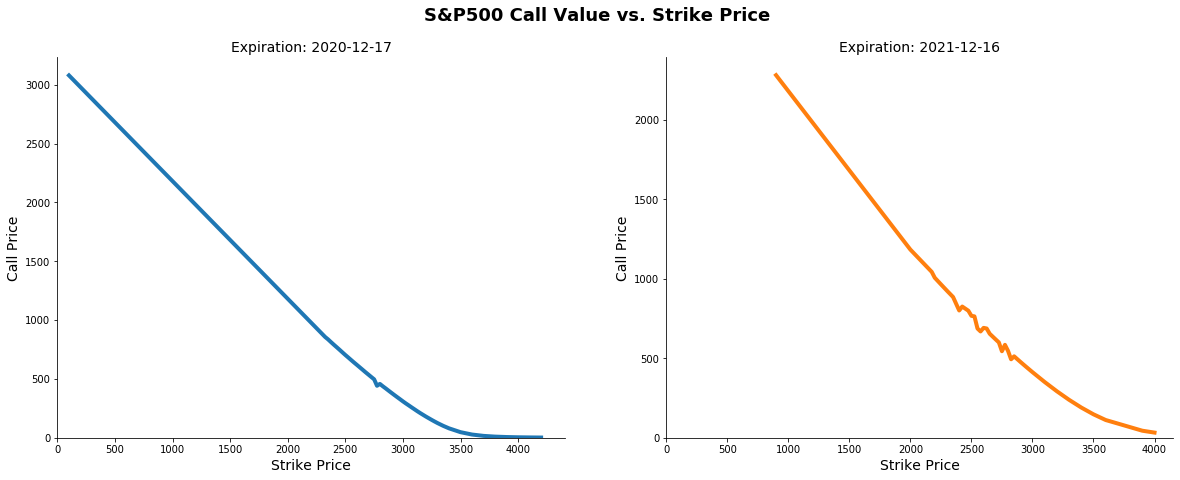

In [18]:
fig,axs = plt.subplots(1,2,figsize=(20,7))

fig.suptitle('S&P500 Call Value vs. Strike Price',fontsize=18,fontweight='bold')

axs[0].plot(K[expirations[0]], C[expirations[0]],linewidth=4.0)
axs[0].set_xlim(xmin=0.0)
axs[0].set_ylim(ymin=0.0)
axs[0].set_xlabel("Strike Price",fontsize=14)
axs[0].set_ylabel("Call Price",fontsize=14)
axs[0].set_title(f"Expiration: {expirations[0]}",fontsize=14)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

axs[1].plot(K[expirations[1]], C[expirations[1]],'tab:orange',linewidth=4.0)
axs[1].set_xlim(xmin=0.0)
axs[1].set_ylim(ymin=0.0)
axs[1].set_xlabel("Strike Price",fontsize=14)
axs[1].set_ylabel("Call Price",fontsize=14)
axs[1].set_title(f"Expiration: {expirations[1]}",fontsize=14)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)


plt.show()